# Hồi quy tuyến tính giữ nguyên các biến định lượng (numeric)

## Đọc hiểu dữ liệu

In [ ]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Load data
housing_data = "https://raw.githubusercontent.com/nampham0804/csv_files/refs/heads/main/Housing.csv"
housing_df = pd.read_csv(housing_data)
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Trước tiên chúng ta cần phải hiểu ý nghĩa của các cột là gì. Đối với đề tài phân tích dữ liệu về các yếu tố ảnh hưởng đến giá nhà thì giá nhà chắc chắn sẽ là biến phụ thuộc và các biến còn lại sẽ là biến độc lập.

**Trong đó:**
* price: giá nhà (biến phụ thuộc/ biến target)

=> Các biến còn lại sẽ là các biến độc lập.
* area: diện tích
* bedrooms: số phòng ngủ
* bathrooms: số phòng tắm
* stories: số tầng
* mainroad: có gần đường chính hay không
* guestroom: có phòng khách hay không
* basement: có tầng hầm hay không
* hotwaterheating: có hệ thống nước nóng hay không
* airconditioning: có điều hòa hay không
* parking: số bãi đậu xe
* prefarea: có vị trí đẹp (khu vực yêu thích) hay không
* furnishingstatus: tình trạng nội thất

## Kiểm tra dữ liệu

In [ ]:
# Kiểm tra số quan sát và số cột của dữ liệu
print(housing_df.shape)

(545, 13)


Dữ liệu có 545 quan sát và 13 trường dữ liệu (hay chính là các cột).

In [ ]:
# Kiểm tra thông tin dữ liệu
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


* Thấy có 6 cột có kiểu dữ liệu là int và 7 cột có kiểu dữ liệu là object (hay có thể hiểu là kiểu chuỗi str).
* Thông tin dữ liệu cho thấy là các cột đều không có giá trị nào bị thiếu, nhưng chỉ đúng với các cột là kiểu số (hay ở đây là int) thôi vì nếu cột số mà có giá trị bị thiếu thì sẽ được hiện lên trong bảng này, hoặc nếu các ô trong cột số có giá trị bị thiếu và có giá trị là chuỗi "NaN" hoặc "?" thì dtype của cả trường (cột) đó sẽ chuyển thành kiểu object ngay, chứ không còn kiểu int nữa.

=> Do đó, chúng ta cần phải kiểm tra các cột có kiểu object để xem những cột đó có thực sự không có giá trị bị thiếu hay không.

In [ ]:
# In ra các kiểu dữ liệu của các trường trong data frame
print(housing_df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


Kiểm tra dữ liệu của các cột có kiểu object (dtype='object').

In [ ]:
# List các cột có kiểu object
list_obj_cols = []
for col in housing_df.columns:
  if housing_df[col].dtype == 'object':
    list_obj_cols.append(col)
print(list_obj_cols)
print(len(list_obj_cols))

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
7


In [ ]:
# Kiểm tra các giá trị unique của các cột có dtype=object
for col in list_obj_cols:
  print(f"{col}: {housing_df[col].unique()}")

mainroad: ['yes' 'no']
guestroom: ['no' 'yes']
basement: ['no' 'yes']
hotwaterheating: ['no' 'yes']
airconditioning: ['yes' 'no']
prefarea: ['yes' 'no']
furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


Thấy các giá trị unique của các cột có dtype='object' không xuất hiện các giá trị '?' hay 'NaN' nên các cột này cũng không có giá trị bị thiếu.

Kiểm tra tứ phân vị của các cột kiểu số.

In [ ]:
# Thống kê mô tả của các cột kiểu số (numeric)
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


* Từ bảng thống kê dữ liệu trên cho ta cột price thì khoảng dữ liệu của nó rất lớn, cột area cũng có khoảng dữ liệu khá là lớn, còn các cột còn lại chỉ nằm trong khoảng [1, 6] đối với cột bedrooms, [1, 4] đối với 2 cột bathrooms và stories và [0, 3] đối với cột parking.
* Độ lệch chuẩn của cột price rất lớn chứng tỏ có sự dao động rất lớn trong giá nhà.
* Độ lệch chuẩn của cột area cũng tương đối lớn.

## Làm sạch dữ liệu

Xử lí giá trị bị thiếu.

In [ ]:
# Thống kê số dữ liệu bị thiếu
housing_df.isnull().sum(axis=0)

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


Do dữ liệu đã clean nên không cần xử lí với giá trị bị thiếu.

Xử lí giá trị ngoại lai.

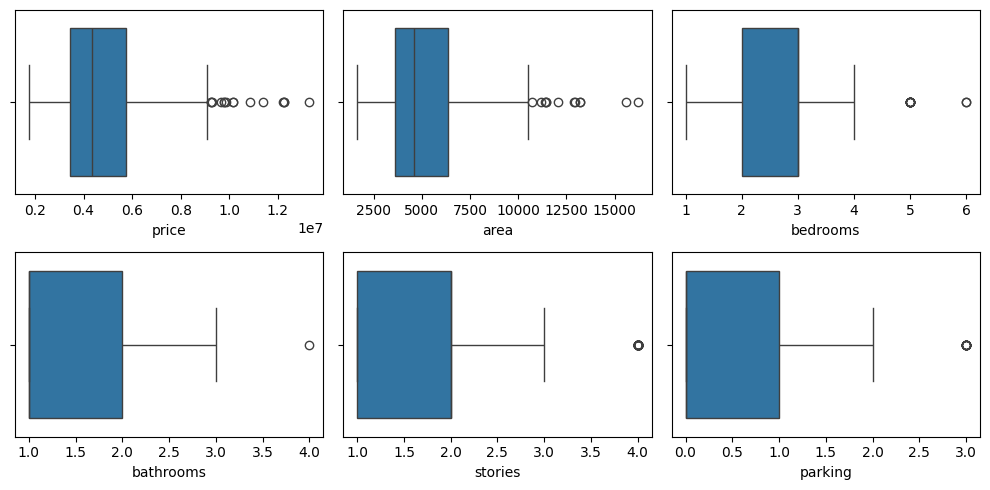

In [ ]:
# Phân tích các giá trị ngoại lai bằng biểu đồ boxplot với các cột numeric hay chính là các biến định lượng
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing_df['price'], ax = axs[0,0], orient='h')
plt2 = sns.boxplot(housing_df['area'], ax = axs[0,1], orient='h')
plt3 = sns.boxplot(housing_df['bedrooms'], ax = axs[0,2], orient='h')
plt1 = sns.boxplot(housing_df['bathrooms'], ax = axs[1,0], orient='h')
plt2 = sns.boxplot(housing_df['stories'], ax = axs[1,1], orient='h')
plt3 = sns.boxplot(housing_df['parking'], ax = axs[1,2], orient='h')

plt.tight_layout()

Xử lí giá trị ngoại lai với giá nhà và diện tích.

In [ ]:
# Số quan sát trước khi bỏ giá trị ngoại lai
housing_df.shape

(545, 13)

In [ ]:
# Loại bỏ giá trị ngoại lai của giá nhà
Q1 = housing_df.price.quantile(0.25)
Q3 = housing_df.price.quantile(0.75)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df.price >= Q1 - 1.5*IQR) & (housing_df.price <= Q3 + 1.5*IQR)]

In [ ]:
# Check số lượng quan sát sau khi đã loại bỏ outliers của price
housing_df.shape

(530, 13)

In [ ]:
# Loại bỏ giá trị ngoại lai của diện tích
Q1 = housing_df.area.quantile(0.25)
Q3 = housing_df.area.quantile(0.75)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df.area >= Q1 - 1.5*IQR) & (housing_df.area <= Q3 + 1.5*IQR)]

In [ ]:
# Check số lượng quan sát sau khi đã bỏ outliers của cả price và area
housing_df.shape

(517, 13)

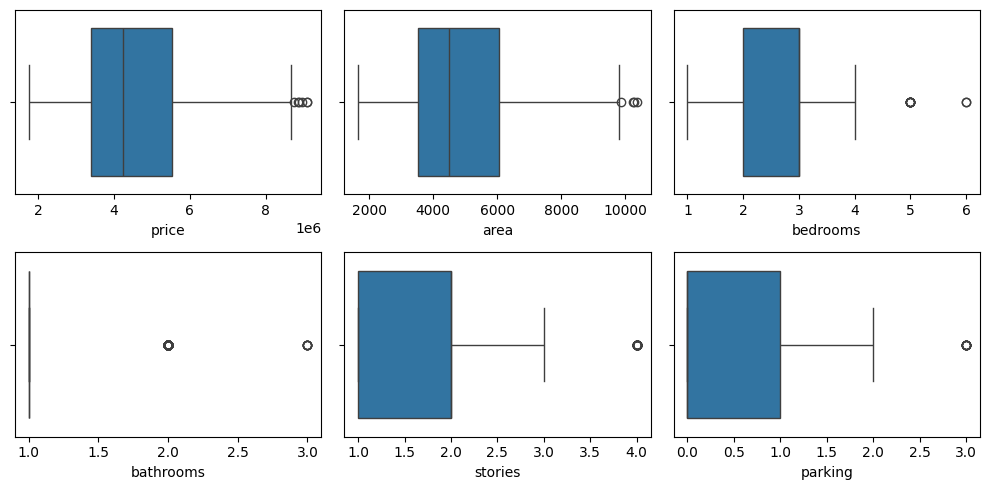

In [ ]:
# Biểu đồ boxplot cho các biến định lượng (numeric) sau khi đã loại bỏ giá trị ngoại lai của price và area
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing_df['price'], ax = axs[0,0], orient='h')
plt2 = sns.boxplot(housing_df['area'], ax = axs[0,1], orient='h')
plt3 = sns.boxplot(housing_df['bedrooms'], ax = axs[0,2], orient='h')
plt1 = sns.boxplot(housing_df['bathrooms'], ax = axs[1,0], orient='h')
plt2 = sns.boxplot(housing_df['stories'], ax = axs[1,1], orient='h')
plt3 = sns.boxplot(housing_df['parking'], ax = axs[1,2], orient='h')

plt.tight_layout()

## Khám phá dữ liệu (Exploratory Data Analytics)

Xem mối quan hệ giữa các biến bằng biểu đồ pairplot đối với các biến định lượng, đây là nơi ban đầu để có thể phát hiện hiện tượng đa cộng tuyến.

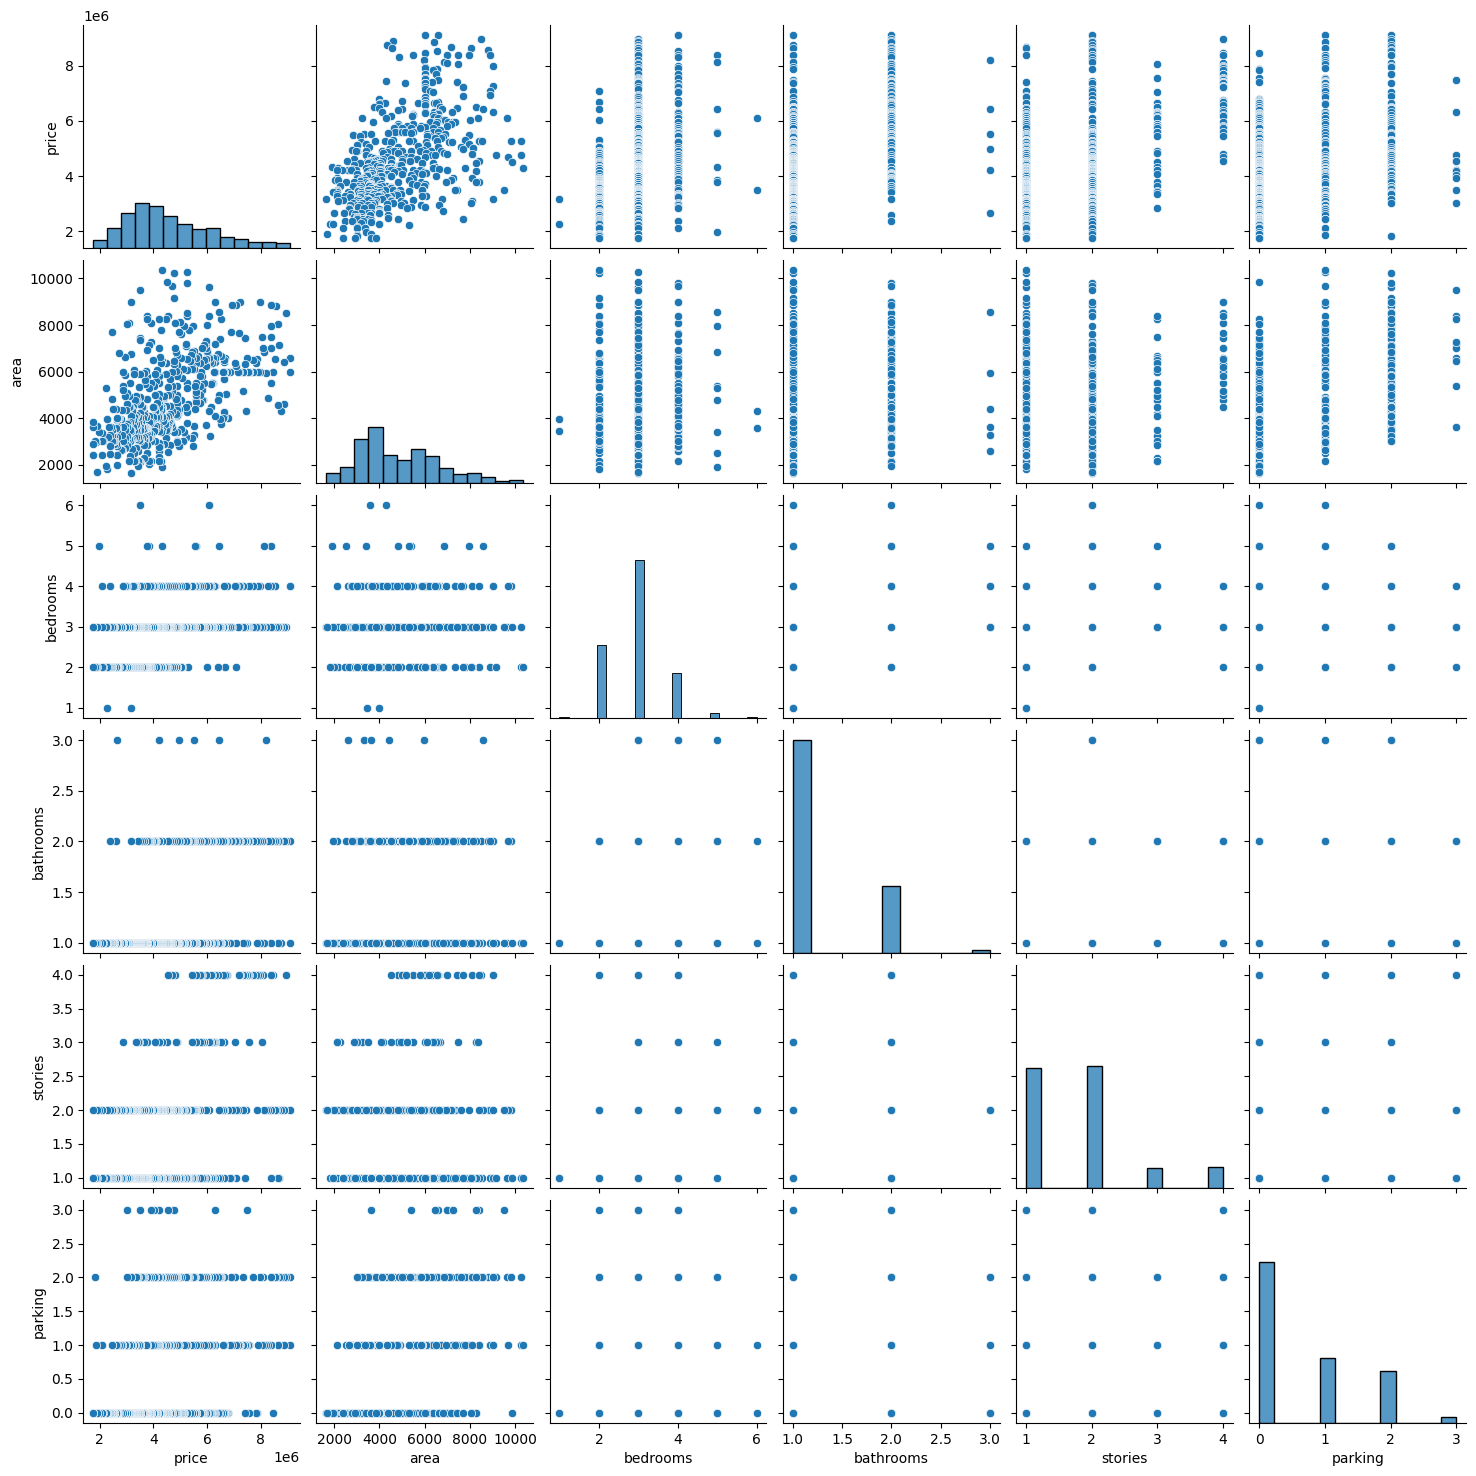

In [ ]:
sns.pairplot(housing_df)
plt.show()

Mối quan hệ giữa giá nhà với các biến phân loại (categorical).

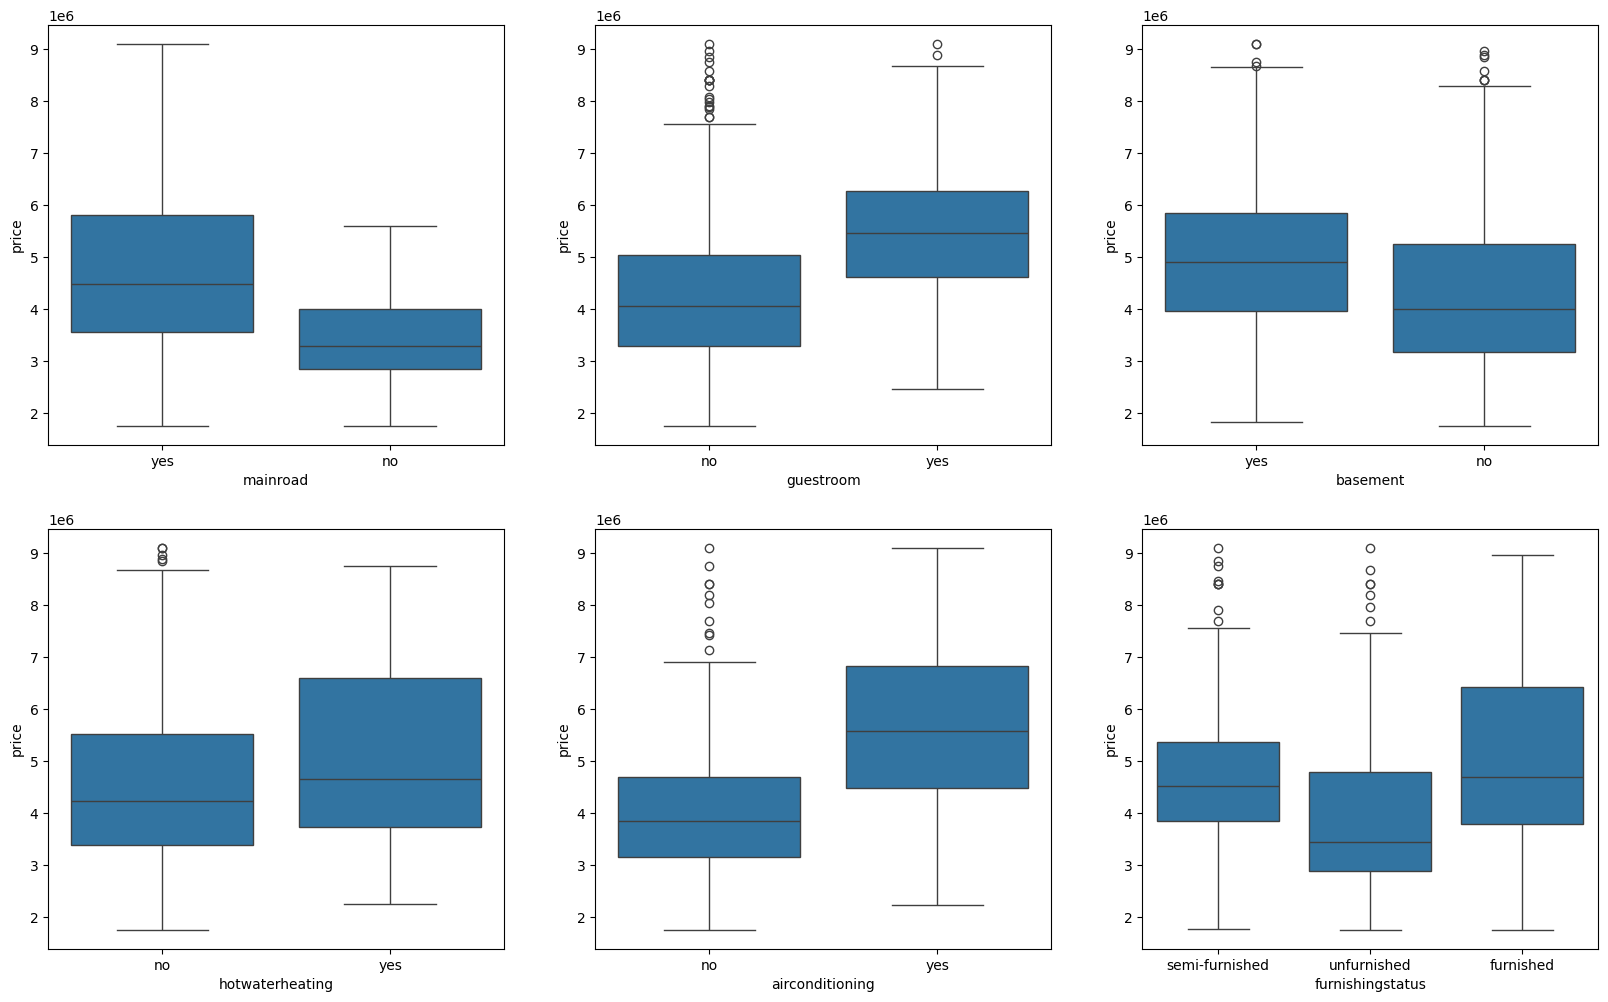

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing_df)
plt.show()

## Chuẩn bị dữ liệu

In [ ]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [ ]:
# List các cột có 2 trạng thái yes, no
list_cols_2_status = []
for col in housing_df.columns:
  if housing_df[col].nunique() == 2:
    list_cols_2_status.append(col)
print(list_cols_2_status)
print(len(list_cols_2_status))

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
6


In [ ]:
# Chuyển các cột có 2 trạng thái yes, no thành 1, 0
# Trong đó yes tương ứng với 1 và no tương ứng với 0
for col in list_cols_2_status:
  housing_df[col] = housing_df[col].map({'yes': 1, 'no': 0})

In [ ]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


* Vì cột furnishingstatus có 3 trạng thái nên sử dụng biến giả (dummy variable) để chuyển cột này thành 2 cột tương ứng cho 2 trạng thái.
* Ở đây tôi sẽ lấy 'furnished' làm phạm trù cơ sở để có thể so sánh 2 trạng thái kia với trạng thái làm phạm trù cơ sở này.

In [ ]:
# Lấy 3 cột trạng thái của cột 'furnishingstatus'
status = pd.get_dummies(housing_df['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


In [ ]:
# Nối status với data frame ban đầu và bỏ cột 'furnishingstatus' và cột 'furnished' (chính là cột phạm trù cơ sở)
housing_df = pd.concat([housing_df, status], axis=1)
housing_df = housing_df.drop(['furnishingstatus', 'furnished'], axis=1)

In [ ]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 15 to 544
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            517 non-null    int64
 1   area             517 non-null    int64
 2   bedrooms         517 non-null    int64
 3   bathrooms        517 non-null    int64
 4   stories          517 non-null    int64
 5   mainroad         517 non-null    int64
 6   guestroom        517 non-null    int64
 7   basement         517 non-null    int64
 8   hotwaterheating  517 non-null    int64
 9   airconditioning  517 non-null    int64
 10  parking          517 non-null    int64
 11  prefarea         517 non-null    int64
 12  semi-furnished   517 non-null    bool 
 13  unfurnished      517 non-null    bool 
dtypes: bool(2), int64(12)
memory usage: 53.5 KB


In [ ]:
# Chuyển các cột có dạng bool về dạng 0, 1
for col in housing_df.columns:
  if housing_df[col].dtype == 'bool':
    housing_df[col] = housing_df[col].astype(int)

In [ ]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


Chia tập dữ liệu thành tập train và tập test.

In [ ]:
# Chia tập dữ liệu thành tập train và tập test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(housing_df, test_size=0.3, random_state=42)

In [ ]:
# Scale dữ liệu sử dụng min max scale, tức là scale dữ liệu về khoảng [0, 1]
# Scale cho các cột không sử dụng biến giả (các cột numeric)

# Các cột numeric ban đầu (các cột không sử dụng biến giả)
list_num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[list_num_cols] = scaler.fit_transform(train_df[list_num_cols])
test_df[list_num_cols] = scaler.transform(test_df[list_num_cols])

In [ ]:
# In ra head của tập train
train_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
338,0.290476,0.247128,0.2,0.0,0.333333,1,1,1,0,0,0.000000,0,1,0
395,0.238095,0.226244,1.0,0.0,0.333333,1,0,0,0,0,0.333333,0,0,1
38,0.845238,0.504699,0.4,0.0,1.000000,1,1,0,0,1,0.666667,0,0,1
298,0.333333,0.481494,0.4,0.0,0.000000,1,0,0,1,0,0.666667,0,1,0
326,0.304762,0.284256,0.6,0.0,0.000000,0,0,1,0,0,0.000000,0,0,1


Trước khi huấn luyện phải kiểm tra ma trận tương quan giữa các cặp biến để có thể loại bỏ biến nếu cần.

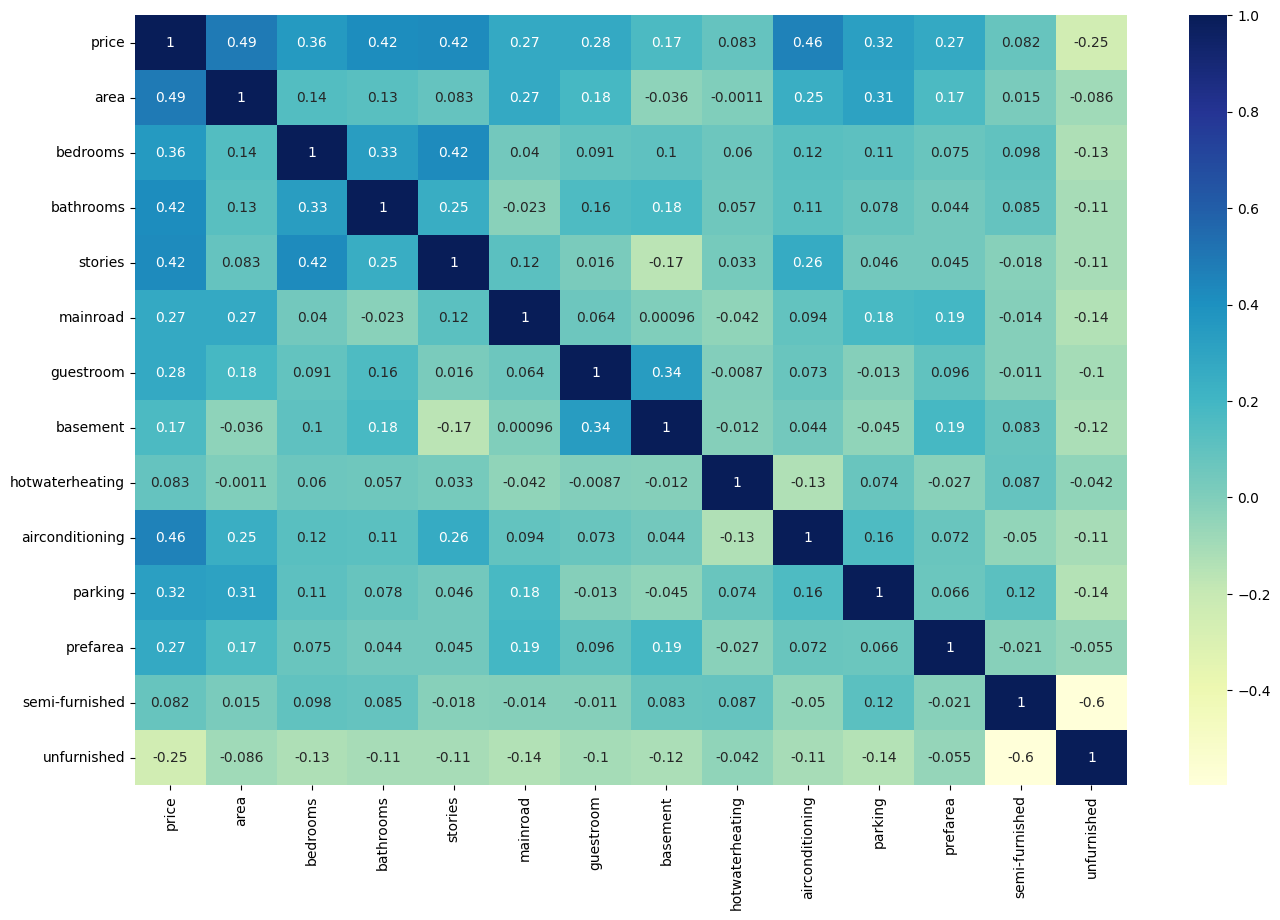

In [ ]:
# Kiểm tra ma trận tương quan giữa các biến trong tập train
plt.figure(figsize = (16, 10))
sns.heatmap(train_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

Chia thành tập X_train, X_test, y_train, y_test để huấn luyện và kiểm thử mô hình.

In [ ]:
# Tập X_train, y_train
X_train = train_df.drop('price', axis=1)
y_train = train_df['price']

# Tập X_test, y_test
X_test = test_df.drop('price', axis=1)
y_test = test_df['price']

## Xây dựng mô hình hồi quy tuyến tính

In [ ]:
# Sử dụng statmodels hiển thị bảng OLS để kiểm tra mối quan hệ giữa biến độc lập và biến phụ thuộc
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
stats_model = sm.OLS(y_train, X_train_sm).fit()
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     46.19
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           1.37e-67
Time:                        15:44:10   Log-Likelihood:                 234.94
No. Observations:                 361   AIC:                            -441.9
Df Residuals:                     347   BIC:                            -387.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0442      0.030     

In [ ]:
# Loại bỏ cột bedrooms, semi-furnished và unfurnished do không có ý nghĩa thống kê
# Các cột biến giả nếu loại phải loại theo cụm (loại thì loại hết, còn giữ lại thì phải giữ lại hết)
X_train_sm = X_train_sm.drop(['bedrooms', 'semi-furnished', 'unfurnished'], axis=1)
X_train_sm = sm.add_constant(X_train_sm)
stats_model = sm.OLS(y_train, X_train_sm).fit()
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     58.55
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           1.23e-68
Time:                        15:44:10   Log-Likelihood:                 231.10
No. Observations:                 361   AIC:                            -440.2
Df Residuals:                     350   BIC:                            -397.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0420      0.021     

In [ ]:
# Tính VIF cho các biến được giữ lại
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['variable'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif

,variable,VIF
0,const,9.613312
1,area,1.302832
2,bathrooms,1.167299
3,stories,1.227620
4,mainroad,1.141434
5,guestroom,1.197996
6,basement,1.288146
7,hotwaterheating,1.038791
8,airconditioning,1.184295
9,parking,1.150591


* Thấy các giá trị VIF của các biến đều < 5 => Không tồn tại hiện tượng đa cộng tuyến.
* Do đó tôi sẽ dùng các biến này để huấn luyện mô hình hồi quy.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sử dụng mô hình hồi quy tuyến tính dựa trên các cột được giữ lại
X_train_1 = X_train.drop(['bedrooms', 'semi-furnished', 'unfurnished'], axis=1)
X_test_1 = X_test.drop(['bedrooms', 'semi-furnished', 'unfurnished'], axis=1)

linear_model = LinearRegression()
linear_model.fit(X_train_1, y_train)

LinearRegression()

## Đánh giá mô hình hồi quy tuyến tính

In [ ]:
# Đánh giá mô hình hồi quy thông qua các metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linear_model.predict(X_test_1)
mse_1 = mean_squared_error(y_test, y_pred)
rmse_1 = np.sqrt(mse_1)
r2_1 = r2_score(y_test, y_pred)
print(f"MSE: {mse_1}")
print(f"RMSE: {rmse_1}")
print(f"R2: {r2_1}")

MSE: 0.016897819211875685
RMSE: 0.12999161208276358
R2: 0.6907731629136623


## Phân tích sai số của tập huấn luyện

Kiểm định sai số có tuân theo phân chuẩn hay không.

/tmp/ipython-input-159-855100442.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


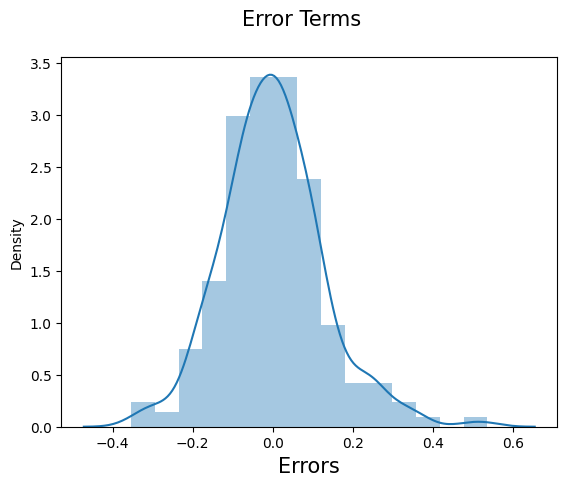

In [ ]:
# Trực quan phân phối để kiểm định sai số của tập train
fig = plt.figure()
res = y_train - linear_model.predict(X_train_1)
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Errors', fontsize = 15)
plt.show()

Biểu đồ cho thấy phân phối của sai số trên tập train đối với mô hình này gần như tuân theo phân phối chuẩn, hơi lệch nhẹ về bên phải 1 chút.

# Hồi quy tuyến tính các biến định lượng (numeric) được chuyển thành biến giả

Các biến định lượng được chuyển thành biến giả phải có số lượng level không quá lớn (tức là số các giá trị unique không quá nhiều).

* Dựa vào biểu đồ pairplot bên trên thì thấy đối với các biến định lượng ban đầu (ngoại trừ biến area vì có khoảng dữ liệu lớn) thì các biến định lượng bạn đầu chỉ có 1 vài giá trị rời rạc. Đó là các biến 'bedrooms', 'bathrooms',	'stories', và	'parking' chưa chắc đã có quan hệ tuyến tính thuần với giá nhà (tức là tiện ích tăng thì giá nhà tăng).
* Trong đó [1, 6] đối với cột bedrooms, [1, 3] đối với cột bathrooms, [1, 4] đối với cột stories và [0, 3] đối với cột parking.

Do đó sẽ chuyển hết các cột này về thành hết biến giả (dummy variables).

In [ ]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [ ]:
housing_df.shape

(517, 14)

In [ ]:
# Xem số lượng giá trị unique của các cột này
for col in ['bedrooms', 'bathrooms', 'stories', 'parking']:
  print(f"{col}: {housing_df[col].unique()}")
  print(f"{col}: {housing_df[col].nunique()}")

bedrooms: [4 3 5 2 6 1]
bedrooms: 6
bathrooms: [1 2 3]
bathrooms: 3
stories: [2 4 1 3]
stories: 4
parking: [2 1 0 3]
parking: 4


## Xem tần suất các giá trị để chọn cột làm phạm trù cơ sở

Xem tần suất các giá trị của các cột này để có thể chọn cột làm phạm trù cơ sở, vì lần thử đầu tiên tôi đã lấy cột có giá trị hiếm (tần suất xuất hiện thấp) làm phạm trù cơ sở thì dẫn đến hiện tượng đa cộng tuyến rất nặng.

In [ ]:
for col in ['bedrooms', 'bathrooms', 'stories', 'parking']:
  print(f"{col}: {housing_df[col].value_counts()}")

bedrooms: bedrooms
3    288
2    133
4     83
5      9
6      2
1      2
Name: count, dtype: int64
bathrooms: bathrooms
1    388
2    123
3      6
Name: count, dtype: int64
stories: stories
2    223
1    219
4     38
3     37
Name: count, dtype: int64
parking: parking
0    294
1    118
2     95
3     10
Name: count, dtype: int64


Bỏ các cột có giá trị ở mức phổ biến nhất làm phạm trù cơ sở để so sánh để có thể giảm thiểu hiện tượng đa cộng tuyến trong mô hình hồi quy.

In [ ]:
# Chuyển các cột 'bedrooms', 'bathrooms',	'stories', và	'parking' thành biến giả
for col in ['bedrooms', 'bathrooms', 'stories', 'parking']:
  housing_df = pd.concat([housing_df, pd.get_dummies(housing_df[col], prefix=col)], axis=1)

In [ ]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,bathrooms_2,bathrooms_3,stories_1,stories_2,stories_3,stories_4,parking_0,parking_1,parking_2,parking_3
15,9100000,6000,4,1,2,1,0,1,0,0,...,False,False,False,True,False,False,False,False,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,...,True,False,False,True,False,False,False,True,False,False
17,8960000,8500,3,2,4,1,0,0,0,1,...,True,False,False,False,False,True,False,False,True,False
18,8890000,4600,3,2,2,1,1,0,0,1,...,True,False,False,True,False,False,False,False,True,False
19,8855000,6420,3,2,2,1,0,0,0,1,...,True,False,False,True,False,False,False,True,False,False


Do bedrooms 3, bathrooms 1, stories 2 và parking 0 là các giá trị xuất hiện phổ biến nhất nên tôi sẽ bỏ các cột này để làm cột phạm trù cơ sở để có thể dùng chúng để so sánh với các cột khác.

In [ ]:
# Bỏ các cột ban đầu được lấy làm biến giả và các cột được lấy làm phạm trù cơ sở
housing_df = housing_df.drop(['bedrooms', 'bathrooms', 'stories', 'parking', 'bedrooms_3', 'bathrooms_1', 'stories_2', 'parking_0'], axis=1)
housing_df.head()

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished,...,bedrooms_5,bedrooms_6,bathrooms_2,bathrooms_3,stories_1,stories_3,stories_4,parking_1,parking_2,parking_3
15,9100000,6000,1,0,1,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
16,9100000,6600,1,1,1,0,1,1,0,1,...,False,False,True,False,False,False,False,True,False,False
17,8960000,8500,1,0,0,0,1,0,0,0,...,False,False,True,False,False,False,True,False,True,False
18,8890000,4600,1,1,0,0,1,0,0,0,...,False,False,True,False,False,False,False,False,True,False
19,8855000,6420,1,0,0,0,1,1,1,0,...,False,False,True,False,False,False,False,True,False,False


In [ ]:
print(housing_df.shape)

(517, 23)


In [ ]:
# Chuyển các giá trị bool thành 0, 1
for col in housing_df.columns:
  if housing_df[col].dtype == 'bool':
    housing_df[col] = housing_df[col].astype(int)

In [ ]:
housing_df.head()

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished,...,bedrooms_5,bedrooms_6,bathrooms_2,bathrooms_3,stories_1,stories_3,stories_4,parking_1,parking_2,parking_3
15,9100000,6000,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
16,9100000,6600,1,1,1,0,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
17,8960000,8500,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
18,8890000,4600,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
19,8855000,6420,1,0,0,0,1,1,1,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
# Chia dữ liệu thành tập train và tập test
train_df, test_df = train_test_split(housing_df, test_size=0.3, random_state=42)

In [ ]:
# Scale dữ liệu cho cột price và cột area
list_cols_scale = ['price', 'area']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[list_cols_scale] = scaler.fit_transform(train_df[list_cols_scale])
test_df[list_cols_scale] = scaler.transform(test_df[list_cols_scale])

In [ ]:
train_df.head()

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished,...,bedrooms_5,bedrooms_6,bathrooms_2,bathrooms_3,stories_1,stories_3,stories_4,parking_1,parking_2,parking_3
338,0.290476,0.247128,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
395,0.238095,0.226244,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
38,0.845238,0.504699,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
298,0.333333,0.481494,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
326,0.304762,0.284256,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


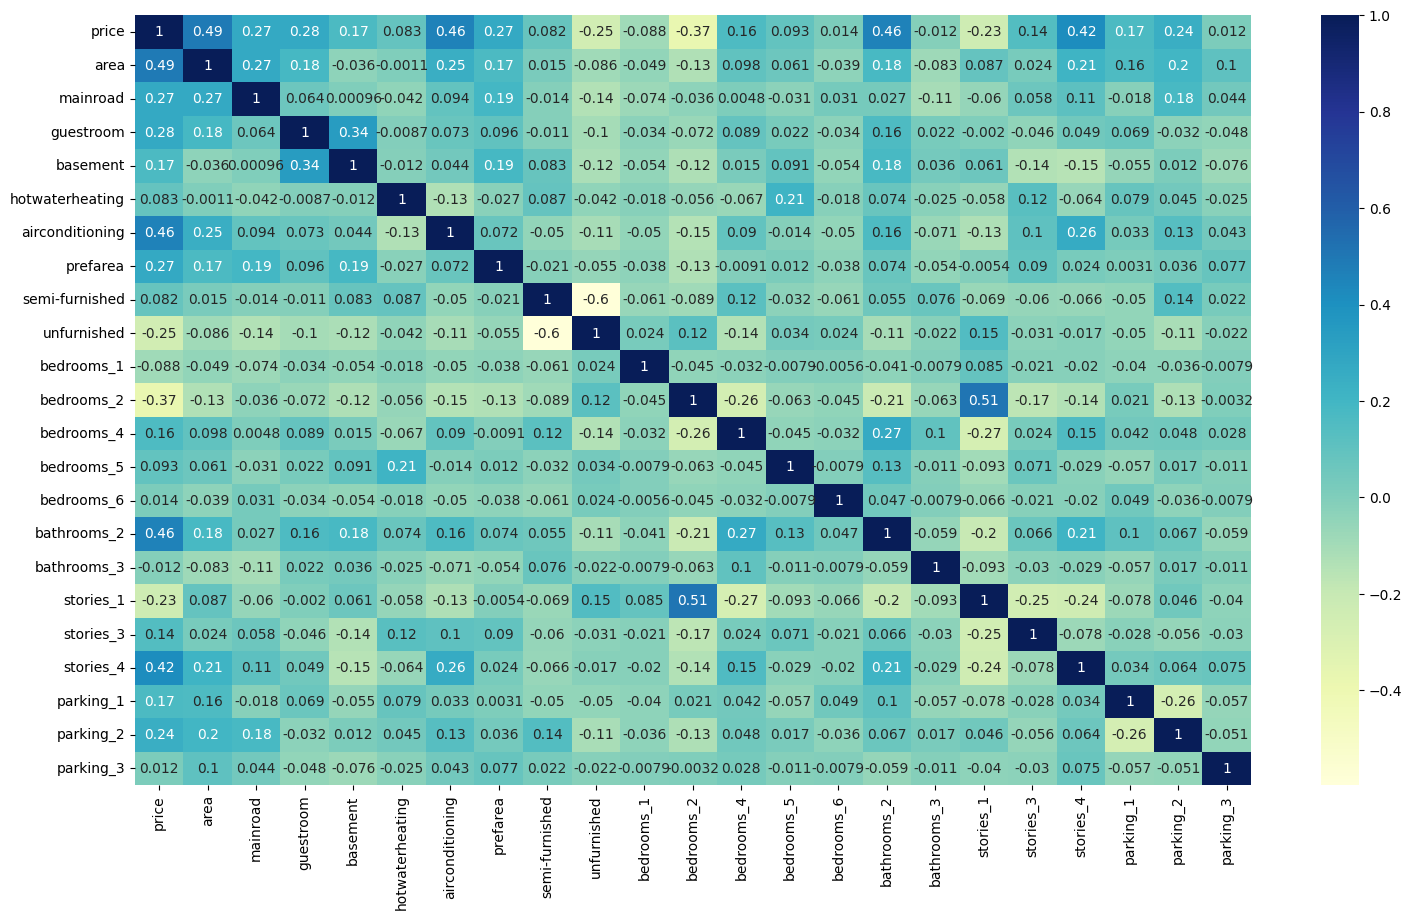

In [ ]:
# Kiểm tra ma trận tương quan giữa các biến trong tập train
plt.figure(figsize = (18, 10))
sns.heatmap(train_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

Chia tập train, test thành X_train, y_train, X_test, y_test để có thể kiểm tra đa cộng tuyến đối với X_train và để có thể huấn luyện và kiểm thử mô hình.

In [ ]:
# Tập X_train, y_train
X_train = train_df.drop('price', axis=1)
y_train = train_df['price']

# Tập X_test, y_test
X_test = test_df.drop('price', axis=1)
y_test = test_df['price']

In [ ]:
# Tính toán VIF cho tập train
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['variable'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

,variable,VIF
0,area,6.111343
1,mainroad,5.459658
2,guestroom,1.475016
3,basement,2.000760
4,hotwaterheating,1.190557
5,airconditioning,1.749884
6,prefarea,1.426831
7,semi-furnished,2.167976
8,unfurnished,1.904881
9,bedrooms_1,1.033331


Thấy VIF của các biến đều < 5 ngoại trừ VIF của 2 biến area và mainroad > 5 nhưng vẫn < 10 nên vẫn có thể được xem xét để chạy mô hình.

In [ ]:
# Sử dụng statmodels hiển thị bảng OLS để kiểm tra mối quan hệ giữa biến độc lập và biến phụ thuộc
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
stats_model = sm.OLS(y_train, X_train_sm).fit()
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     31.29
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           4.15e-68
Time:                        15:44:13   Log-Likelihood:                 254.12
No. Observations:                 361   AIC:                            -462.2
Df Residuals:                     338   BIC:                            -372.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1337      0.027     

* Ở đây tuy có nhiều cột không có ý nghĩa thống kê nhưng nó là 1 trong các dummy của 1 nhóm, có thể trong mỗi nhóm dummy có 1 vài biến không có ý nghĩa riêng lẻ nhưng cả nhóm có thể có ý nghĩa tổng thể.
* Biến không có ý nghĩa nhưng giúp mô hình ổn định hơn (cụ thể là R2 và R2 hiệu chỉnh cải thiện đáng kể so với mô hình cũ chỉ là 0.626 và 0.615).
* Do đó tôi vẫn sẽ giữ các biến này lại để huấn luyện và kiểm thử mô hình.

## Xây dựng mô hình hồi quy tuyến tính

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model_1 = LinearRegression()
linear_model_1.fit(X_train, y_train)

LinearRegression()

## Đánh giá mô hình hồi quy tuyến tính

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linear_model_1.predict(X_test)
mse_2 = mean_squared_error(y_test, y_pred)
rmse_2 = np.sqrt(mse_2)
r2_2 = r2_score(y_test, y_pred)
print(f"MSE: {mse_2}")
print(f"RMSE: {rmse_2}")
print(f"R2: {r2_2}")

MSE: 0.016924367249485848
RMSE: 0.13009368643207037
R2: 0.6902873389385028


## Phân tích sai số của tập huấn luyện

Kiểm định sai số có tuân theo phân chuẩn hay không.

/tmp/ipython-input-179-319128600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


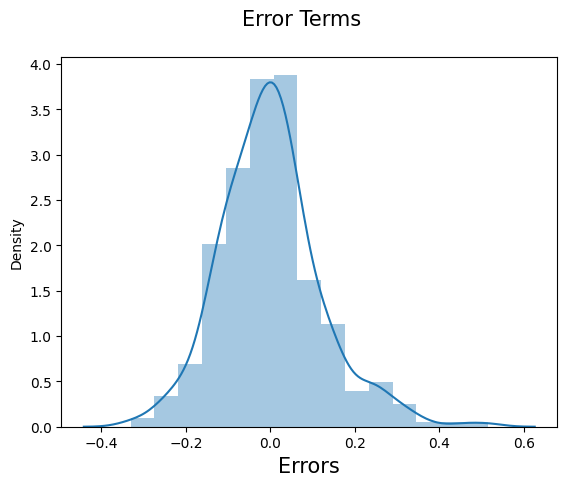

In [ ]:
# Trực quan phân phối để kiểm định sai số của tập train
fig = plt.figure()
res = y_train - linear_model_1.predict(X_train)
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Errors', fontsize = 15)
plt.show()

Biểu đồ cho thấy phân phối của sai số trên tập train đối với mô hình này gần như tuân theo phân phối chuẩn, hơi lệch nhẹ về bên phải 1 chút.

# So sánh 2 mô hình

Về mặt tổng quan 2 mô hình đều cho ra kết quả dự đoán có R2 khá là cao nhưng rất sát nhau, nhưng mô hình 2 phức tạp hơn mô hình 1.

In [ ]:
# In ra các chỉ số metric của 2 mô hình để so sánh
print(f"Mô hình 1: MSE: {mse_1}, RMSE: {rmse_1}, R2: {r2_1}")
print(f"Mô hình 2: MSE: {mse_2}, RMSE: {rmse_2}, R2: {r2_2}")

Mô hình 1: MSE: 0.016897819211875685, RMSE: 0.12999161208276358, R2: 0.6907731629136623
Mô hình 2: MSE: 0.016924367249485848, RMSE: 0.13009368643207037, R2: 0.6902873389385028


* Do sai số và giá trị R2 khá là sát nhau nên vẽ biểu đồ rất khó để nhận ra.
* Tuy nhiên ở đây mặc dù mô hình 1 đơn giản hơn mô hình 2 nhưng chỉ số lỗi nhỏ hơn và R2 nhỉnh hơn 1 chút so với mô hình 2.
* Do đó, tôi sẽ chọn mô hình 1 để có thể làm mô hình dự đoán phù hợp cho các dữ liệu mới.

# Kết luận

* Chọn mô hình 1 do đơn giản hơn khá là nhiều nhưng hiệu quả trên tập test lại nhỉnh hơn 1 chút so với mô hình 2.
* Chú thích: Mô hình 1 là mô hình giữ nguyên các biến định lượng làm biến độc lập, mô hình 2 là chuyển các biến định lượng có ít mức (level) thành các biến giả (dummy variables).